In [60]:
import pandas as pd

fdust_df = pd.read_csv("미세먼지용_데이터셋_전기차제외.csv", encoding="UTF-8")

fdust_df.head()

,datetime,region,pm10,pm25,temperature,wind_direction,wind_speed,precipitation,humidity,aod_avg,aod_max
0,2017-01-01 00:00:00,강남구,65,48,-0.4,195.2,1.8,0.0,54.1,343.393,4875.0
1,2017-01-01 01:00:00,강남구,63,48,1.4,69.1,1.3,0.0,78.0,343.393,4875.0
2,2017-01-01 02:00:00,강남구,61,44,1.2,66.2,1.6,0.0,80.0,343.393,4875.0
3,2017-01-01 03:00:00,강남구,71,44,0.5,66.0,1.5,0.0,84.0,343.393,4875.0
4,2017-01-01 04:00:00,강남구,79,44,0.6,63.4,0.5,0.0,86.0,343.393,4875.0


In [61]:
df1 = fdust_df[['datetime', 'region', 'pm10', 'pm25']]

df1.head()

,datetime,region,pm10,pm25
0,2017-01-01 00:00:00,강남구,65,48
1,2017-01-01 01:00:00,강남구,63,48
2,2017-01-01 02:00:00,강남구,61,44
3,2017-01-01 03:00:00,강남구,71,44
4,2017-01-01 04:00:00,강남구,79,44


In [62]:
df1['region'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [63]:
#동부 - 중랑구
jungnang_df = df1[df1['region'] == '중랑구'].copy()
#서부 - 구로구
guro_df = df1[df1['region'] == '구로구'].copy()
#남부 - 관악구
gwanak_df = df1[df1['region'] == '관악구'].copy()
#북부 - 강북구
gangbuk_df = df1[df1['region'] == '강북구'].copy()
#중앙부 - 용산구
yongsan_df = df1[df1['region'] == '용산구'].copy()
#서울평균
seoul_df = df1.groupby('datetime')[['pm10', 'pm25']].mean().reset_index().copy()

import numpy as np
#값 반올림
seoul_df['pm10'] = np.ceil(seoul_df['pm10']).astype(int)
seoul_df['pm25'] = np.ceil(seoul_df['pm25']).astype(int)

In [64]:
# datetime 컬럼이 datetime 타입이 아닐 경우 변환
df_list = [jungnang_df, guro_df, gwanak_df, gangbuk_df, yongsan_df, seoul_df]

for df in df_list:
    df['datetime'] = pd.to_datetime(df['datetime'])

In [65]:
# 숫자형 컬럼만 선택
numeric_cols = jungnang_df.select_dtypes(include='number').columns.tolist()


# datetime 기준으로 숫자형 컬럼 평균값 집계
jungnang_grouped = jungnang_df.groupby('datetime')[numeric_cols].mean().reset_index()
guro_grouped = guro_df.groupby('datetime')[numeric_cols].mean().reset_index()
gwanak_grouped = gwanak_df.groupby('datetime')[numeric_cols].mean().reset_index()
gangbuk_grouped = gangbuk_df.groupby('datetime')[numeric_cols].mean().reset_index()
yongsan_grouped = yongsan_df.groupby('datetime')[numeric_cols].mean().reset_index()
seoul_grouped = seoul_df.groupby('datetime')[numeric_cols].mean().reset_index()

# datetime 기준으로 오름차순 정렬
jungnang_grouped.sort_values(by='datetime', inplace=True)
guro_grouped.sort_values(by='datetime', inplace=True)
gwanak_grouped.sort_values(by='datetime', inplace=True)
gangbuk_grouped.sort_values(by='datetime', inplace=True)
yongsan_grouped.sort_values(by='datetime', inplace=True)
seoul_grouped.sort_values(by='datetime', inplace=True)

In [66]:
import statsmodels.api as sm

result1 = sm.tsa.seasonal_decompose(jungnang_grouped['pm10'], model='additive', period=8760)
result2 = sm.tsa.seasonal_decompose(jungnang_grouped['pm25'], model='additive', period=8760)

result3 = sm.tsa.seasonal_decompose(guro_grouped['pm10'], model='additive', period=8760)
result4 = sm.tsa.seasonal_decompose(guro_grouped['pm25'], model='additive', period=8760)

result5 = sm.tsa.seasonal_decompose(gwanak_grouped['pm10'], model='additive', period=8760)
result6 = sm.tsa.seasonal_decompose(gwanak_grouped['pm25'], model='additive', period=8760)

result7 = sm.tsa.seasonal_decompose(gangbuk_grouped['pm10'], model='additive', period=8760)
result8 = sm.tsa.seasonal_decompose(gangbuk_grouped['pm25'], model='additive', period=8760)

result9 = sm.tsa.seasonal_decompose(yongsan_grouped['pm10'], model='additive', period=8760)
result10 = sm.tsa.seasonal_decompose(yongsan_grouped['pm25'], model='additive', period=8760)

result11 = sm.tsa.seasonal_decompose(seoul_grouped['pm10'], model='additive', period=8760)
result12 = sm.tsa.seasonal_decompose(seoul_grouped['pm25'], model='additive', period=8760)

In [67]:
name_dict = {'jungnang_grouped': 'Jungnang', 'guro_grouped': 'Guro', 'gwanak_grouped': 'Gwanak', 'gangbuk_grouped': 'Gangbuk', 'yongsan_grouped': 'Yongsan', 'seoul_grouped': 'Seoul'}

In [75]:
from statsmodels.tsa.stattools import adfuller

# 적합한 d 값을 찾기 위한 함수 정의
# ADF 테스트를 통해 정상성을 만족하는 차분 횟수를 찾는 함수
# 최대 차분 횟수는 5로 제한
# verbose=True로 설정하면 중간 결과를 출력
# 정상성을 만족하는 d 값을 반환
def find_optimal_d(series, max_d=5, verbose=True):
    """
    ADF 테스트를 반복하면서 정상성이 될 때까지 d를 증가
    :param series: 시계열 데이터 (Series 형태)
    :param max_d: 최대 차분 횟수 제한
    :param verbose: 중간 결과 출력 여부
    :return: 적절한 d 값
    """
    d = 0
    current_series = series.copy()

    while d <= max_d:
        result = adfuller(current_series.dropna())
        p_value = result[1]

        if verbose:
            print(f"d = {d} | ADF Statistic = {result[0]:.4f} | p-value = {p_value:.4f}")

        if p_value < 0.05:
            return d  # 정상성을 만족하는 d를 찾음

        # 그렇지 않으면 차분을 한 번 더 수행
        current_series = current_series.diff()
        d += 1

    # 최대 d를 초과했음 → 마지막 d 반환
    print("Warning: max_d 초과, 비정상성 잔존 가능")
    return d

In [76]:
region_grouped = {
    'jungnang': jungnang_grouped,
    'guro': guro_grouped,
    'gwanak': gwanak_grouped,
    'gangbuk': gangbuk_grouped,
    'yongsan': yongsan_grouped,
    'seoul': seoul_grouped
}

In [77]:
d_results = []

for region_name, df in region_grouped.items():
    for col in ['pm10', 'pm25']:
        series = df[col].dropna()

        d = find_optimal_d(series, max_d=5, verbose=False)
        d_results.append({
            '지역': region_name,
            '구분': col.upper(),
            '최적 차분 차수 d': d
        })

d_df = pd.DataFrame(d_results)
print(d_df)

          지역    구분  최적 차분 차수 d
0   jungnang  PM10           0
1   jungnang  PM25           0
2       guro  PM10           0
3       guro  PM25           0
4     gwanak  PM10           0
5     gwanak  PM25           0
6    gangbuk  PM10           0
7    gangbuk  PM25           0
8    yongsan  PM10           0
9    yongsan  PM25           0
10     seoul  PM10           0
11     seoul  PM25           0


In [79]:
air_data_list = []

for region, df in region_grouped.items():
    for col in ['pm10', 'pm25']:
        temp_df = df[['datetime', col]].copy()
        temp_df['지역'] = region
        temp_df['구분'] = col.upper()
        temp_df.rename(columns={col: '값'}, inplace=True)
        air_data_list.append(temp_df)

air_data = pd.concat(air_data_list).reset_index(drop=True)
air_data['datetime'] = pd.to_datetime(air_data['datetime'])

In [80]:
meta_df = pd.DataFrame(d_results)

In [87]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Apple SD Gothic Neo'
matplotlib.rcParams['axes.unicode_minus'] = False

In [98]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def run_auto_arima(data, meta_df, date_col, value_col, train_ratio=0.8):
    results_dict = {}

    for _, row in meta_df.iterrows():
        region = row['지역']
        category = row['구분']

        # 1. 데이터 필터링 및 전처리
        ts_data = data[(data['지역'] == region) & (data['구분'] == category)].copy()
        ts_data[date_col] = pd.to_datetime(ts_data[date_col])
        ts_data = ts_data.sort_values(by=date_col).set_index(date_col)
        ts_data = ts_data.dropna()

        # 2. Train/Test 분할
        train_size = int(len(ts_data) * train_ratio)
        train = ts_data.iloc[:train_size]
        test = ts_data.iloc[train_size:]

        # 3. auto_arima 모델 적합
        model = auto_arima(train[value_col],
                           seasonal=False,
                           stepwise=True,
                           suppress_warnings=True,
                           error_action='ignore')

        # 4. 예측 수행
        forecast = model.predict(n_periods=len(test))

        # 5. RMSE 계산
        rmse = np.sqrt(mean_squared_error(test[value_col], forecast))
        print(f"[{region} - {category}] RMSE: {rmse:.2f} | Order: {model.order}")

        # 6. 결과 저장
        results_dict[(region, category)] = {
            'rmse': rmse,
            'order': model.order,
            'forecast': forecast,
            'model': model
        }

        # 7. 시각화
        plt.figure(figsize=(12, 6))
        plt.plot(train.index, train[value_col], label='Train')
        plt.plot(test.index, test[value_col], label='Test', color='red')
        plt.plot(test.index, forecast, label='Forecast', color='green')
        plt.title(f"Auto ARIMA - {region}, {category} (RMSE={rmse:.2f})")
        plt.xlabel('Date')
        plt.ylabel(value_col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return results_dict


/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

[jungnang - PM10] RMSE: 33.62 | Order: (5, 1, 0)


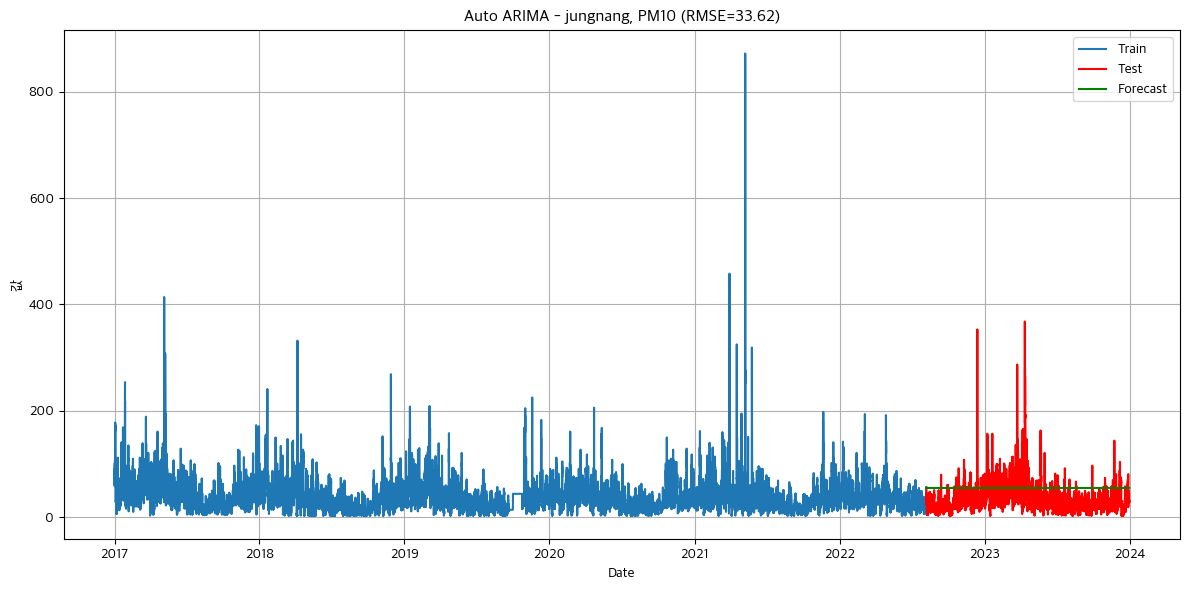

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

[jungnang - PM25] RMSE: 24.34 | Order: (0, 1, 5)


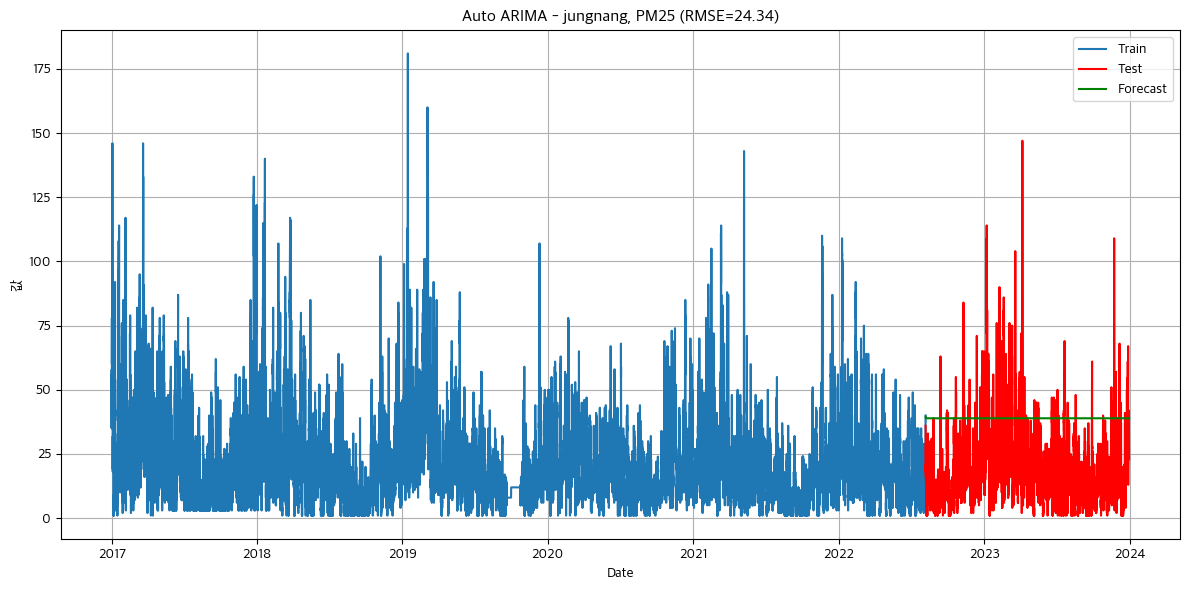

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

KeyboardInterrupt: 

In [100]:
run_auto_arima(
    data=air_data,
    meta_df=meta_df, 
    date_col='datetime',
    value_col='값',
    train_ratio=0.8)

In [93]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def run_arima(data, meta_df, date_col, value_col, train_ratio=0.8, order_pq=(8, 0)):
    results_dict = {}

    for _, row in meta_df.iterrows():
        region = row['지역']
        category = row['구분']
        d = 1

        # 1. 필터링 및 시계열 구성
        ts_data = data[(data['지역'] == region) & (data['구분'] == category)].copy()
        ts_data[date_col] = pd.to_datetime(ts_data[date_col])
        ts_data = ts_data.sort_values(by=date_col).set_index(date_col)
        ts_data = ts_data.dropna()

        # 2. Train/Test 분할
        train_size = int(len(ts_data) * train_ratio)
        train = ts_data.iloc[:train_size]
        test = ts_data.iloc[train_size:]

        # 3. ARIMA 학습 및 예측
        model = ARIMA(train[value_col], order=(order_pq[0], d, order_pq[1]))
        fitted = model.fit()
        forecast = fitted.forecast(steps=len(test))

        # 4. RMSE 계산
        rmse = np.sqrt(mean_squared_error(test[value_col], forecast))
        print(f"[{region} - {category}] RMSE: {rmse:.2f}")

        # 5. 결과 저장
        results_dict[(region, category)] = {
            'rmse': rmse,
            'model': fitted,
            'forecast': forecast
        }

        # 6. 시각화
        plt.figure(figsize=(12, 6))
        plt.plot(train.index, train[value_col], label='Train')
        plt.plot(test.index, test[value_col], label='Test', color='red')
        plt.plot(test.index, forecast, label='Forecast', color='green')
        plt.title(f"ARIMA({order_pq[0]},{d},{order_pq[1]}) - {region}, {category} (RMSE={rmse:.2f})")
        plt.xlabel('Date')
        plt.ylabel(value_col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return results_dict

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[jungnang - PM10] RMSE: 33.44


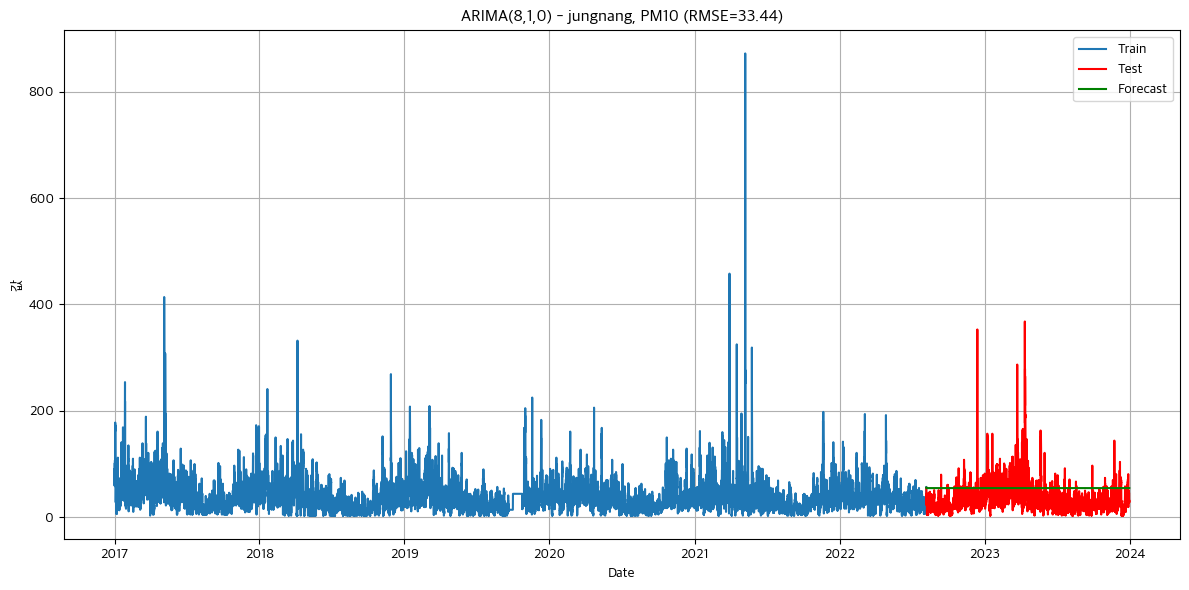

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[jungnang - PM25] RMSE: 24.46


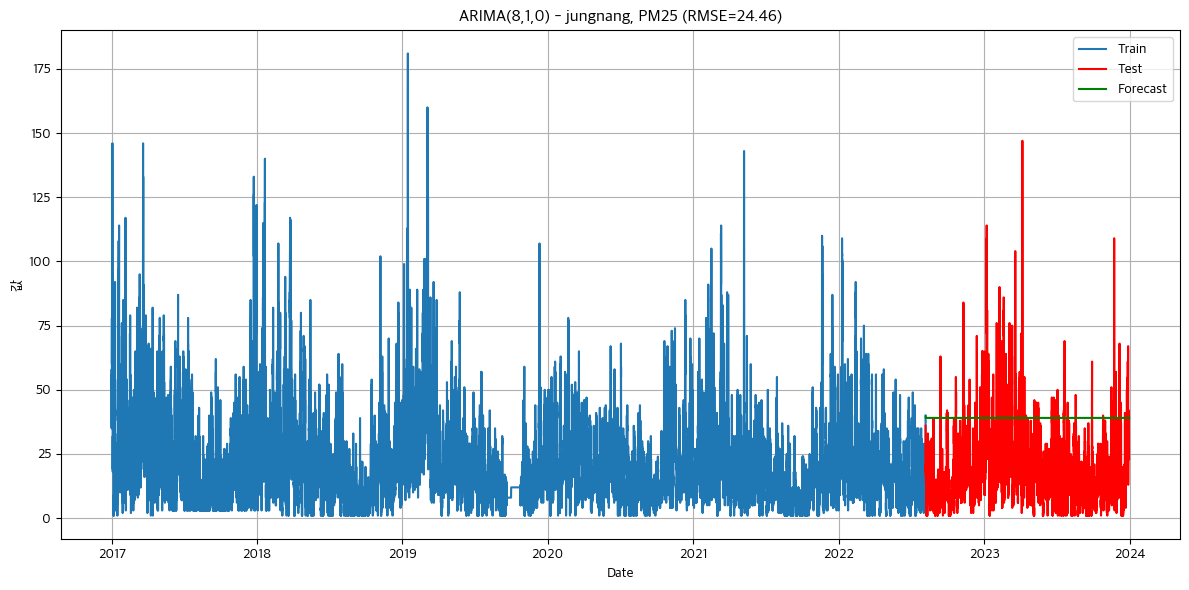

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[guro - PM10] RMSE: 36.89


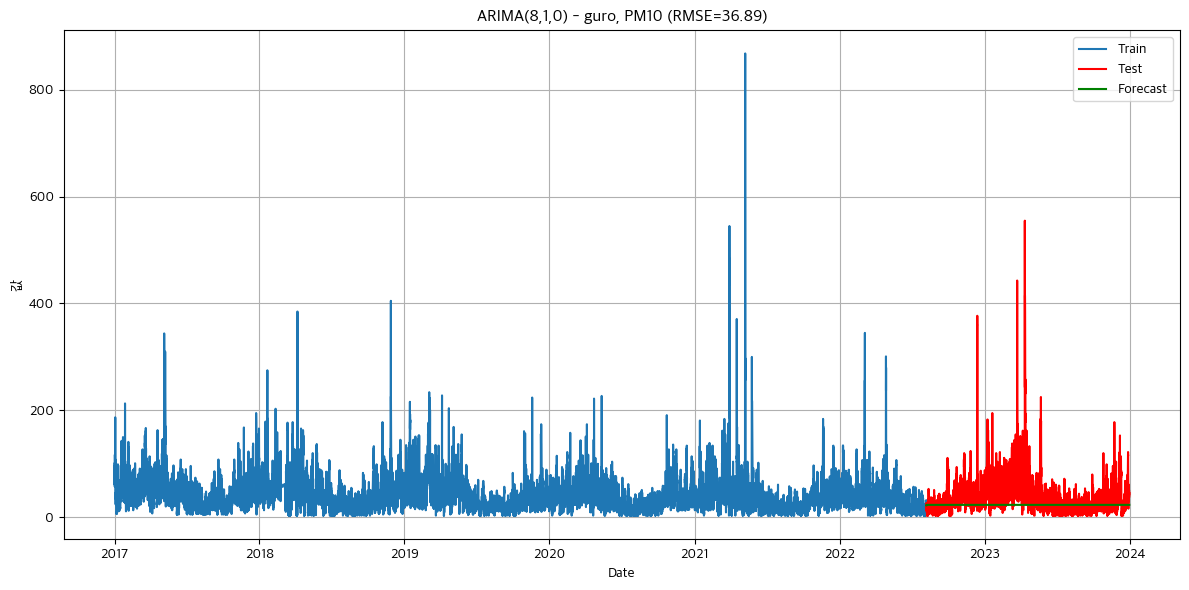

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[guro - PM25] RMSE: 18.43


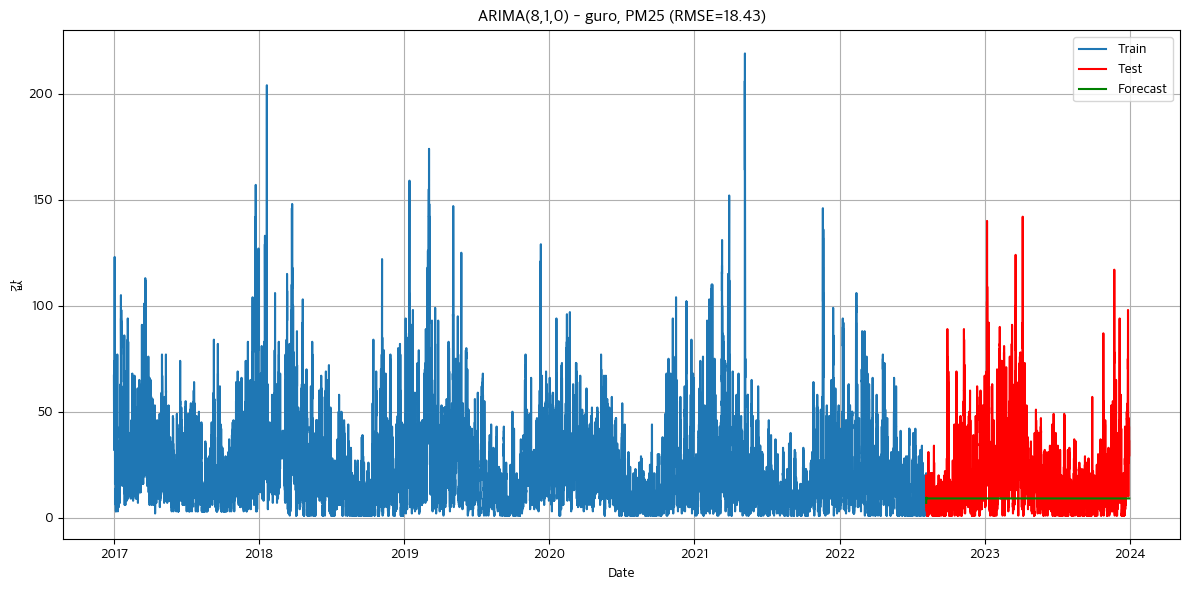

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[gwanak - PM10] RMSE: 28.71


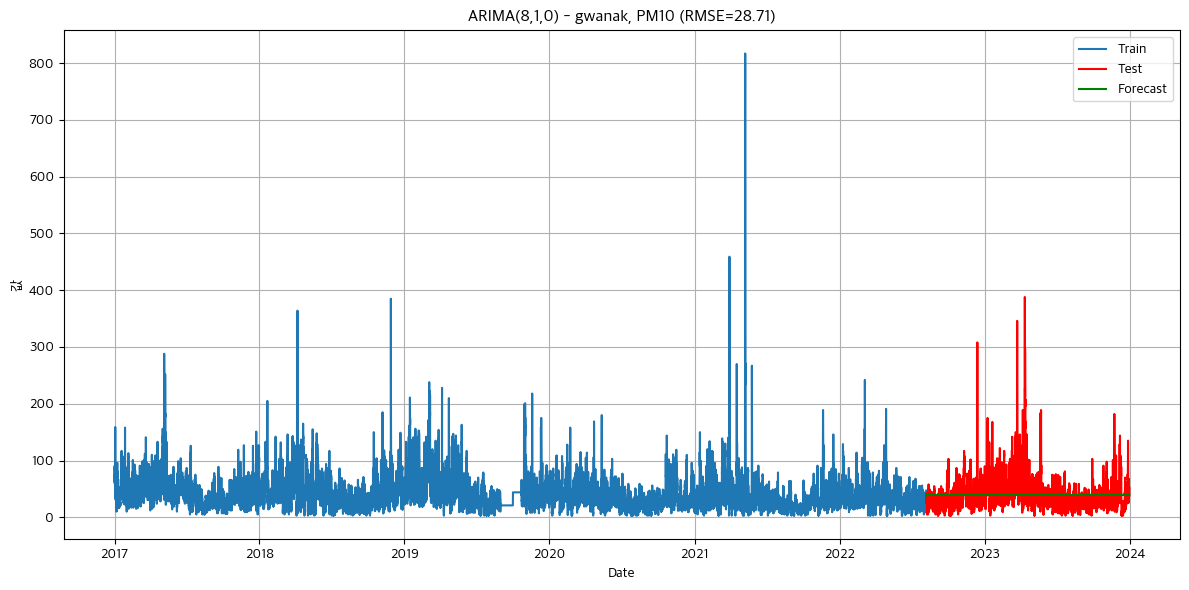

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[gwanak - PM25] RMSE: 16.68


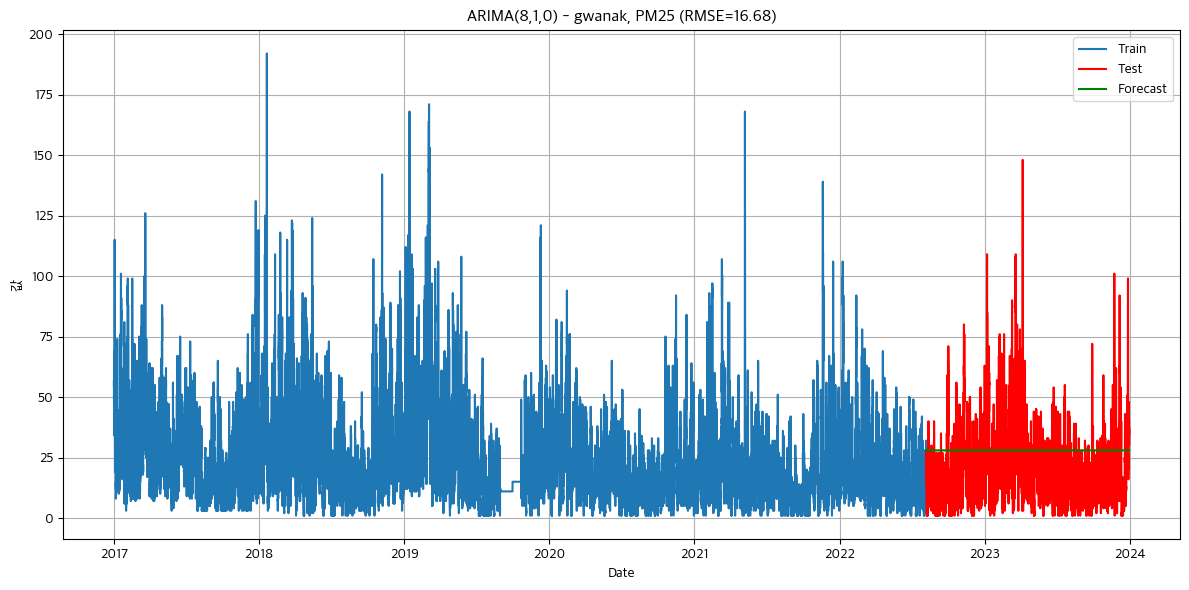

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[gangbuk - PM10] RMSE: 35.24


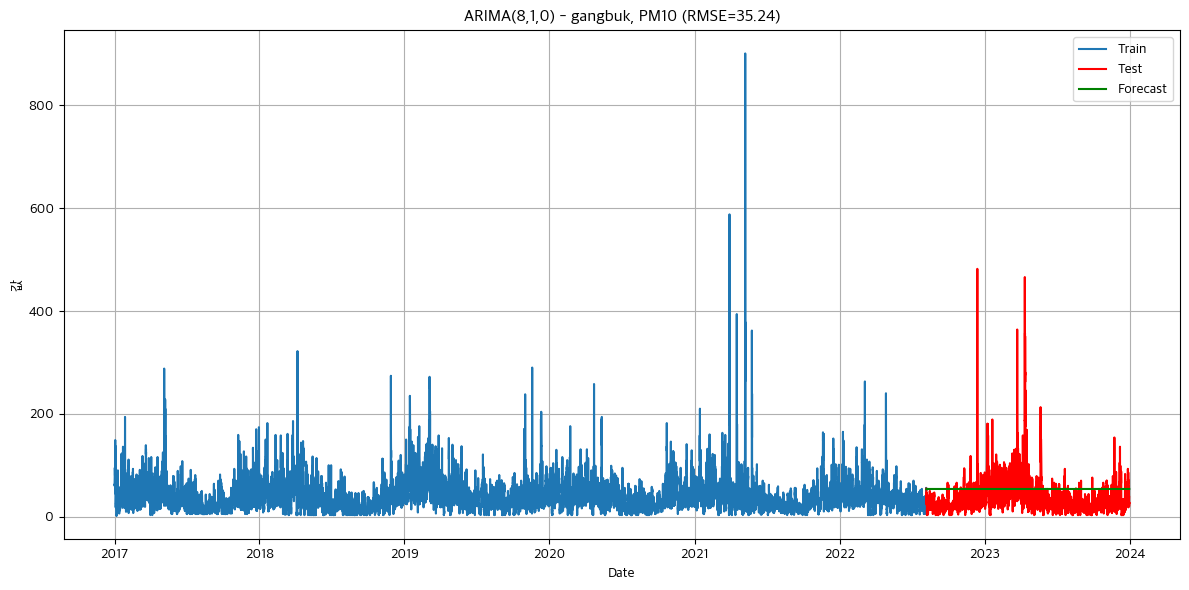

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[gangbuk - PM25] RMSE: 20.48


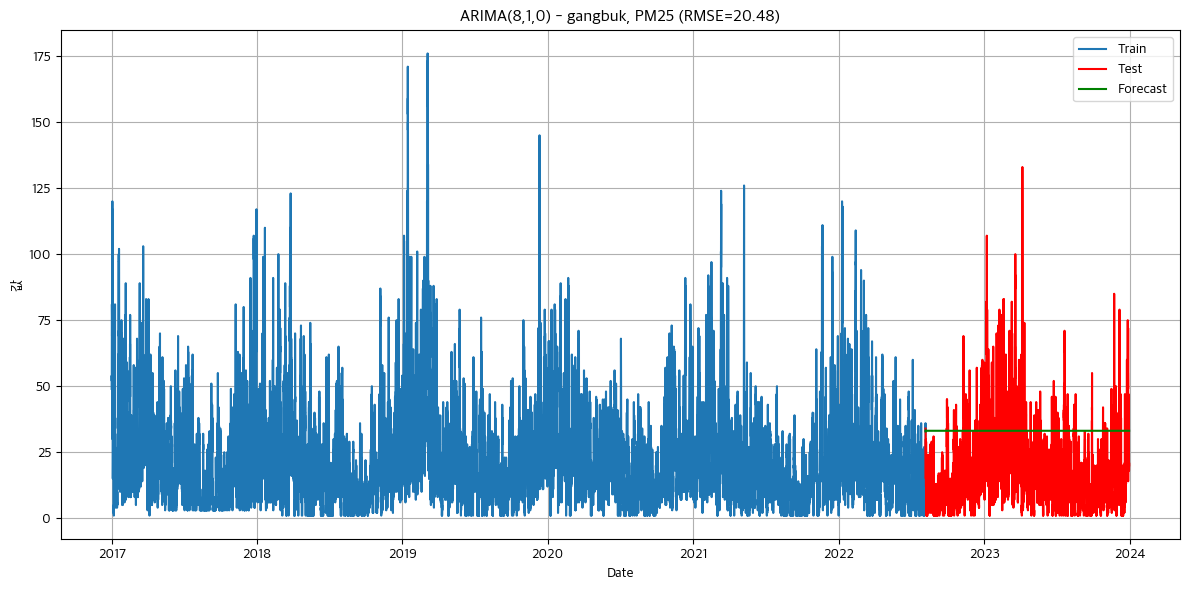

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[yongsan - PM10] RMSE: 30.47


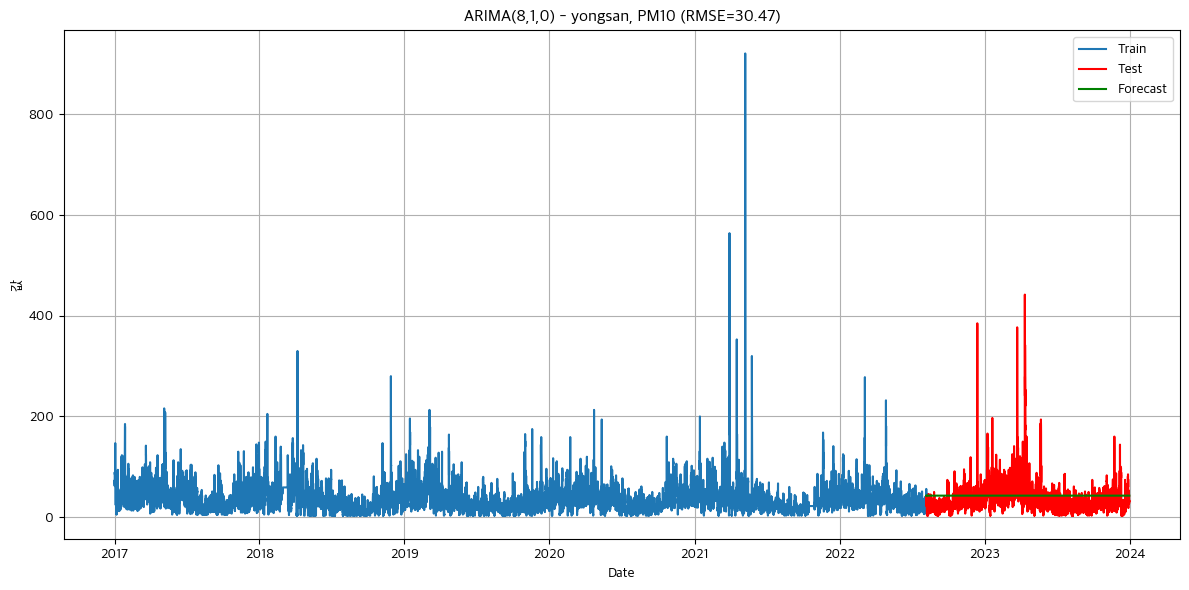

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[yongsan - PM25] RMSE: 17.66


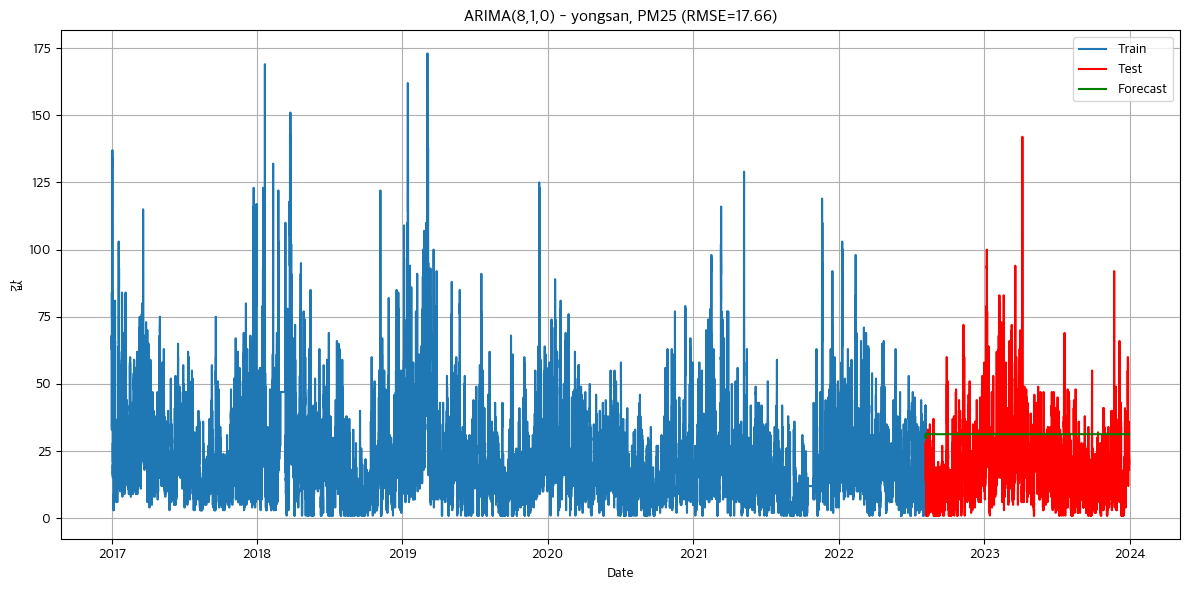

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[seoul - PM10] RMSE: 28.10


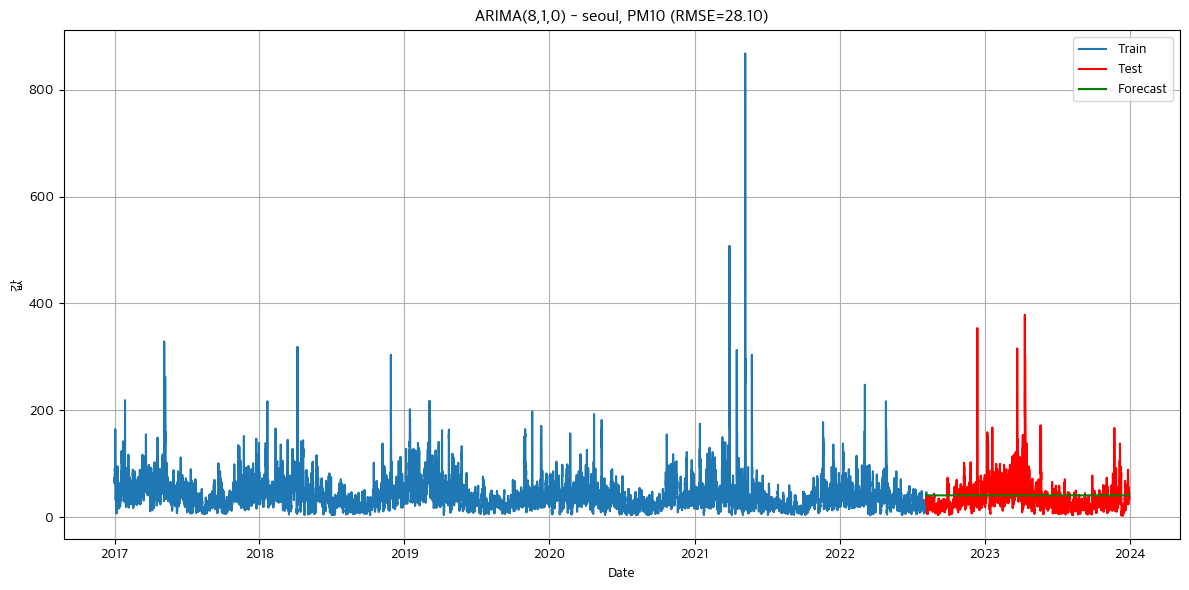

/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/project_2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


[seoul - PM25] RMSE: 17.00


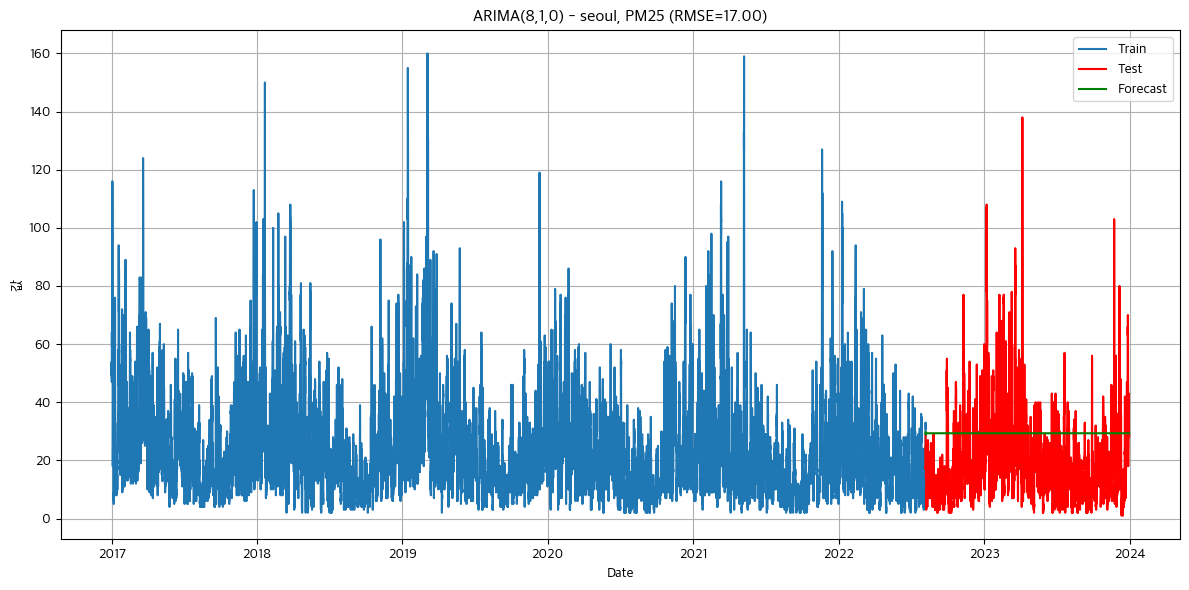

In [95]:
results = run_arima(
    data=air_data,
    meta_df=meta_df,
    date_col='datetime',
    value_col='값',
    train_ratio=0.8,
    order_pq=(8, 0)
)